In [128]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution, maplotlib_plot_map as plot_map

In [138]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,12952,None,None,88441.479549
2020-06-13,12953,None,None,81686.209029
2020-06-14,12954,None,None,75468.857123
2020-06-15,12955,None,None,69782.967951
2020-06-16,12956,None,None,64802.944578
...,...,...,...,...
2020-11-12,13105,None,None,575363.155000
2020-11-13,13106,None,None,570223.743499
2020-11-14,13107,None,None,564056.750209


In [139]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/Downloads/zoe_uk_active_cases_2020-11-16_2020-11-16-20-05.pickle


In [140]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/Downloads/zoe_uk_active_cases_2020-11-15_2020-11-15-19-11.pickle


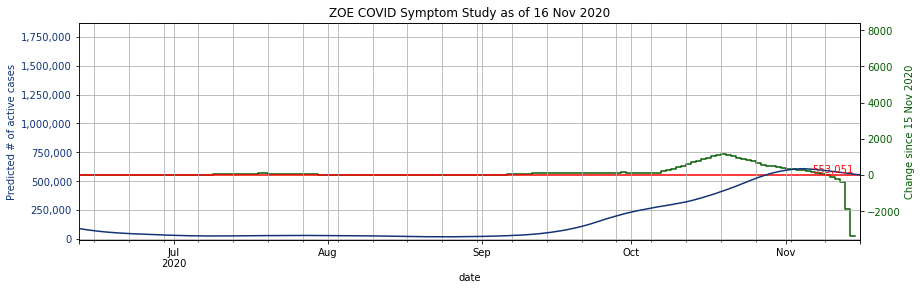

In [141]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

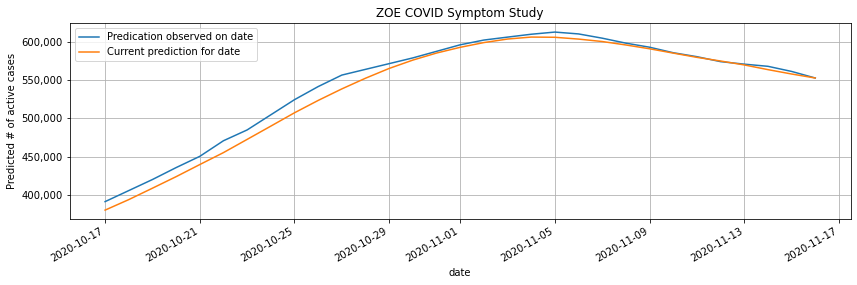

In [142]:
plot_study_evolution(curr_date, days=30)

In [143]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)
prevalence_map

,cartodb_id,the_geom,the_geom_webmercator,objectid,lad16cd,lad16nm,lad16nmw,bng_e,bng_n,long,...,discrete_percentage,discrete_cases_pm,discrete_cases_p100k,percentage_string,cases_pm_string,cases_p100k_string,cases_string,data_status,country,region
0,6648,0103000020E610000001000000C4010000AD9CD15F9CE2...,0103000020110F000001000000C401000034EC1A1775E3...,1,E06000001,Hartlepool,None,447157,531476,-1.27023,...,-1.0,-1,NaN,Not enough contributors,Not enough contributors,Not enough contributors,Not enough contributors,05:00:02 16-11-2020,England,North East
1,6660,0106000020E61000000300000001030000000100000004...,0106000020110F00000300000001030000000100000004...,13,E06000013,North Lincolnshire,None,497798,410996,-0.52410,...,0.1,1000,1000,0.8 %,8370,837,1426,05:00:02 16-11-2020,England,Yorkshire and The Humber
2,6649,0106000020E61000000200000001030000000100000013...,0106000020110F00000200000001030000000100000013...,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,...,0.1,1000,1000,1.5 %,15270,1527,2133,05:00:02 16-11-2020,England,North East
3,6650,0106000020E61000000200000001030000000100000006...,0106000020110F00000200000001030000000100000006...,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,...,0.1,1000,1000,0.6 %,5524,552,748,05:00:02 16-11-2020,England,North East
4,6651,0106000020E61000000200000001030000000100000025...,0106000020110F00000200000001030000000100000025...,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,...,0.1,1000,1000,0.8 %,8399,840,1644,05:00:02 16-11-2020,England,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,7017,0106000020E610000002000000010300000001000000B0...,0106000020110F000002000000010300000001000000B0...,389,W06000022,Newport,Casnewydd,337897,187433,-2.89769,...,0.1,1000,1000,2.2 %,21529,2153,3276,05:00:02 16-11-2020,Wales,Wales
387,7018,0103000020E6100000010000006D1000003E242470162E...,0103000020110F0000010000006D10000075DF530DAA62...,390,W06000023,Powys,Powys,302328,273254,-3.43533,...,0.1,1000,1000,0.9 %,8890,889,1162,05:00:02 16-11-2020,Wales,Wales
388,7019,0103000020E61000000100000060010000CAAE459CF9AC...,0103000020110F000001000000600100003FE916C4D9A7...,391,W06000024,Merthyr Tydfil,Merthyr Tudful,305916,206424,-3.36425,...,-1.0,-1,NaN,Not enough contributors,Not enough contributors,Not enough contributors,Not enough contributors,05:00:02 16-11-2020,Wales,Wales
389,7020,0103000020E610000001000000C0000000CA21EFF2CDF8...,0103000020110F000001000000C0000000DEAADBECED86...,325,E09000032,Wandsworth,None,525152,174137,-0.20021,...,0.1,1000,1000,0.7 %,6665,666,2166,05:00:02 16-11-2020,England,London


In [144]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/Downloads/zoe_prevalence_map_2020-11-16_2020-11-16-20-06.pickle


In [145]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
325,Bradford,E08000032,2.428646
262,Wrexham,W06000006,2.382870
40,Stoke-on-Trent,E06000021,2.240482
386,Newport,W06000022,2.152871
302,Rochdale,E08000005,2.047286
277,Nuneaton and Bedworth,E07000219,2.030418
390,Dundee City,S12000042,1.930165
263,Ceredigion,W06000008,1.916216
280,Warwick,E07000222,1.877201
292,Worcester,E07000237,1.787693


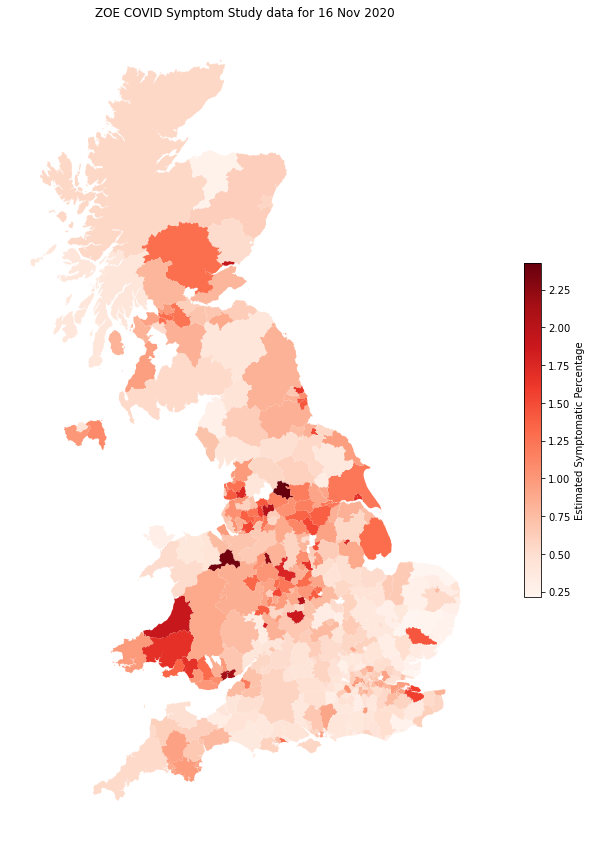

In [146]:
plot_map()